In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import collections, numpy
from sklearn.impute import SimpleImputer

# READING THE DATASET

url_class = "data_clinical_sample.txt"
url_features = "data_log2CNA.txt"

dataf= pd.read_csv(url_features , sep = '\t')
dataf = dataf.dropna(subset =['Entrez_Gene_Id'])
dataf = dataf.drop(columns = ['Hugo_Symbol'])
datac=pd.read_csv(url_class, comment = '#',  index_col=0, sep='\t')

#COMBINING THE CLINICAL AND CNA EXPRESSIONS INTO A SINGLE DATASET
GeneData = dataf.transpose()
GeneData.columns = GeneData.iloc[0]
GeneData = GeneData.drop(GeneData.index[0])

newdataframe = datac[['SAMPLE_ID','TUMOR_TYPE']]

dlabel = GeneData.merge(newdataframe, left_index=True, right_on='SAMPLE_ID', how='inner')
dlabel = dlabel.loc[:, ~dlabel.columns.duplicated()]


#HANDLING THE MISSING VALUES WITH IMPUTER
from sklearn.preprocessing import Imputer
imputer = SimpleImputer(strategy = 'mean')
imputer = imputer.fit(dlabel.iloc[:, 1:-2])
dlabel.iloc[:, 1:-2] = imputer.transform(dlabel.iloc[:, 1:-2])

### drop the only value of tumor type - LOW GRADE GLIOMA

indexNames = dlabel[ dlabel['TUMOR_TYPE'] == 'Low-Grade Glioma' ].index
dlabel.drop(indexNames , inplace=True)

## The Target column
X = dlabel.iloc[:, 1:-2]
Y = dlabel['TUMOR_TYPE']
print(collections.Counter(Y))

# # Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
print(collections.Counter(Y))

# REMOVING THE NEGATIVE VALUES 

X = X.applymap(lambda x: 2 ** x)

Counter({'Astrocytoma': 194, 'Oligodendroglioma': 187, 'Oligoastrocytoma': 129})
Counter({0: 194, 2: 187, 1: 129})


In [3]:
from sklearn.feature_selection import SelectFromModel,VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import chi2
from sklearn.decomposition import FastICA
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier

X_new = X
var_thres = VarianceThreshold(0.1)
var_thres.fit(X_new)

# print(var_thres.variances_ < 5, np.max(var_thres.variances_))

print(X_new.shape)
# X_new = X_new[:,  np.logical_and(var_thres.variances_ > 0.1, var_thres.variances_ < 5)]
# print(X_new.shape)
X_new = SelectFromModel(estimator = RandomForestClassifier(n_estimators = 100)).fit_transform(X_new, Y)
print(X_new.shape)
X_new = FastICA(n_components = 20).fit_transform(X_new)
X_new = normalize(X_new, norm='l2')

X_new.shape

(510, 24925)
(510, 5304)


(510, 20)

In [4]:
features  = pd.DataFrame(X_new)

features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.245277,0.148743,-0.000325,0.068173,-0.135550,-0.115662,0.484667,0.159100,0.399179,-0.082320,-0.000086,-0.275597,0.096893,-0.003225,0.528581,0.092734,-0.137521,0.111499,-0.223797,-0.014209
1,-0.014588,0.135878,-0.526306,0.270762,-0.049437,0.602067,0.119251,0.088749,-0.159985,-0.109875,0.053398,-0.275022,0.071120,-0.031935,0.036894,0.034822,-0.031683,0.085758,0.329869,-0.044821
2,-0.235068,0.022606,0.229482,-0.181753,-0.059536,-0.232827,0.398345,0.131750,0.076250,0.103563,-0.083128,0.056419,0.202103,-0.010051,0.320733,0.020858,-0.633383,-0.123412,0.193344,0.008736
3,0.009761,-0.019977,-0.015483,0.027412,0.010259,-0.017237,0.031127,-0.976037,-0.002492,-0.088377,0.173538,-0.014524,0.018704,-0.062013,-0.023924,0.008610,0.028979,-0.025597,0.003688,0.001493
4,-0.133253,0.055871,0.114441,0.086237,0.022049,-0.112800,0.350687,0.094858,0.259501,0.123316,-0.140018,-0.139138,-0.347419,-0.092043,0.610560,-0.090911,0.413924,0.090862,-0.044605,0.009390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,-0.171985,0.074434,0.026790,-0.091759,-0.099690,-0.067391,-0.743802,-0.215948,-0.343791,-0.022792,-0.191108,-0.063224,-0.038613,0.020918,0.408650,-0.087214,0.044917,0.008202,-0.029646,0.051617
506,-0.165624,0.047769,0.165548,0.067811,0.448298,-0.069093,0.372472,0.179931,-0.160633,-0.042952,0.216828,-0.012640,0.000973,0.044941,0.574140,0.008998,0.384621,0.028962,-0.071982,0.030226
507,-0.180157,0.048767,-0.010704,0.059131,0.724060,-0.015293,-0.136804,0.091114,-0.114961,-0.127848,0.015383,-0.114488,-0.045694,-0.049726,0.540409,0.032734,0.258570,0.002378,-0.008370,-0.050272
508,-0.210796,0.040682,0.188268,0.205270,-0.133351,-0.110282,0.020707,0.224889,0.066259,0.061474,-0.088922,0.038880,0.014005,-0.195449,0.645936,-0.027963,0.565924,0.018017,-0.027655,-0.004754


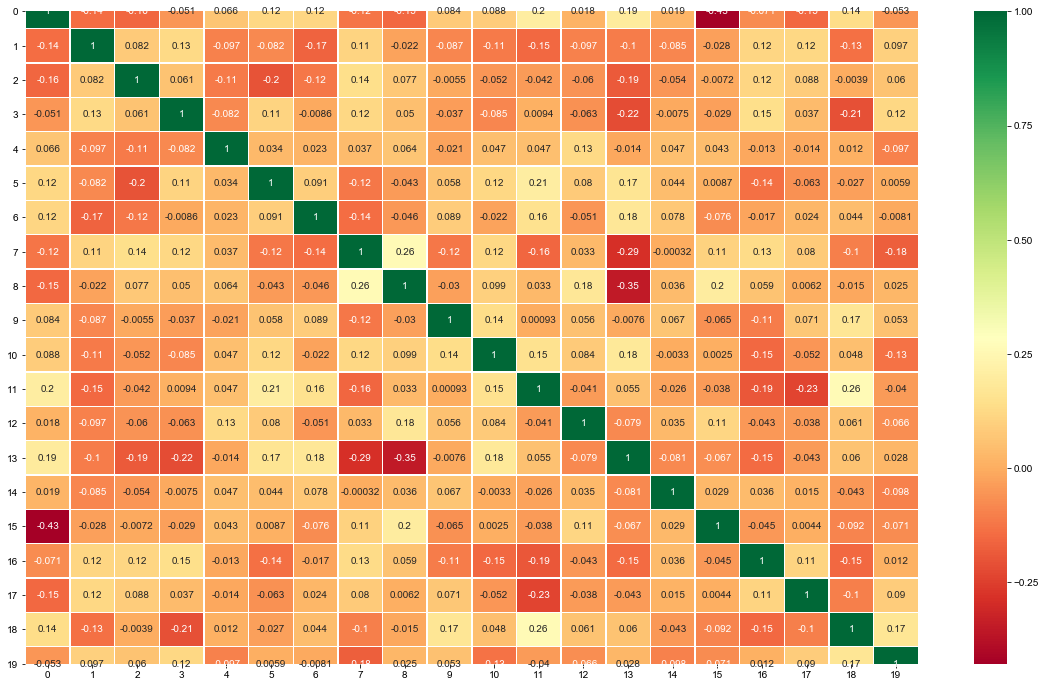

In [5]:
sns.heatmap(features.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) #data.corr()-->correlation matrix
sns.set(font_scale=1.25)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

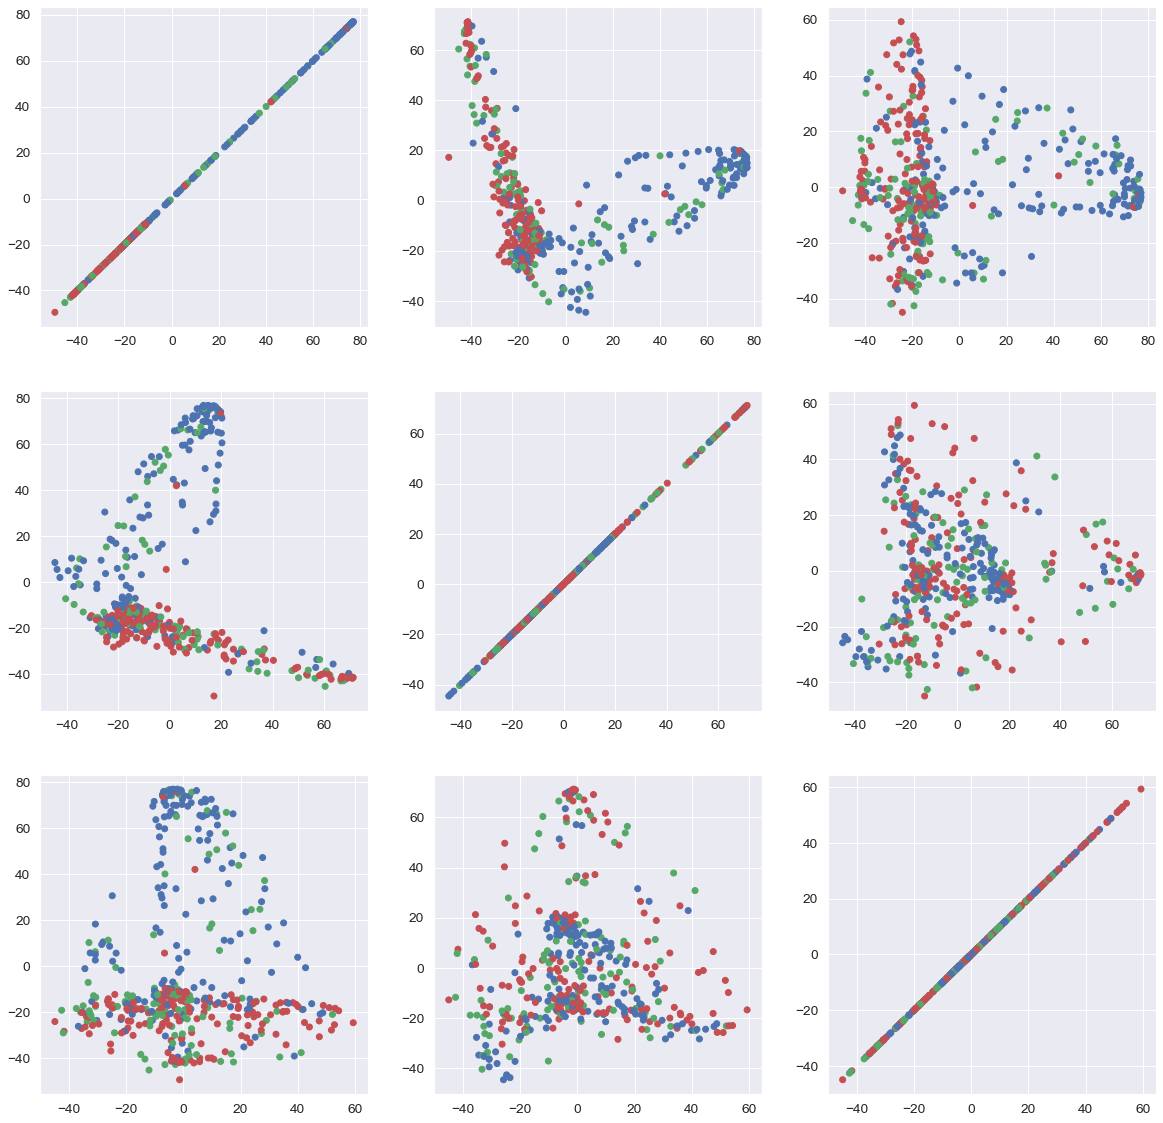

In [6]:
from sklearn.decomposition import KernelPCA
import matplotlib as mpl

kpca = KernelPCA(kernel = 'poly', degree = 3, gamma = 20, n_components=3)
kpca_fit = kpca.fit_transform(X_new)
colors = ['r','g','b']


fig, axes = plt.subplots(3, 3, figsize=(20,20))

for i in range(3):
    for j in range(3):
#         class_filter = Y == 2
        axes[i, j].scatter(kpca_fit[:, i], kpca_fit[:, j], c = Y, cmap = mpl.colors.ListedColormap(colors))
#         axes[i, j].scatter(kpca_fit[class_filter, i], kpca_fit[class_filter, j])

In [7]:
from sklearn.model_selection import train_test_split
#Train and test split


X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2,shuffle=True)
print("shape",X_train.shape, y_train.shape )
print("Train Class",collections.Counter(y_train))
print("Test Class",collections.Counter(y_test))
print("test shape",X_test.shape, y_test.shape)


# from imblearn.combine import SMOTEENN

# sme2 = SMOTEENN (random_state= 42)
# X_new, Y = sme2.fit_resample(X_new, Y)

shape (408, 20) (408,)
Train Class Counter({0: 150, 2: 145, 1: 113})
Test Class Counter({0: 44, 2: 42, 1: 16})
test shape (102, 20) (102,)


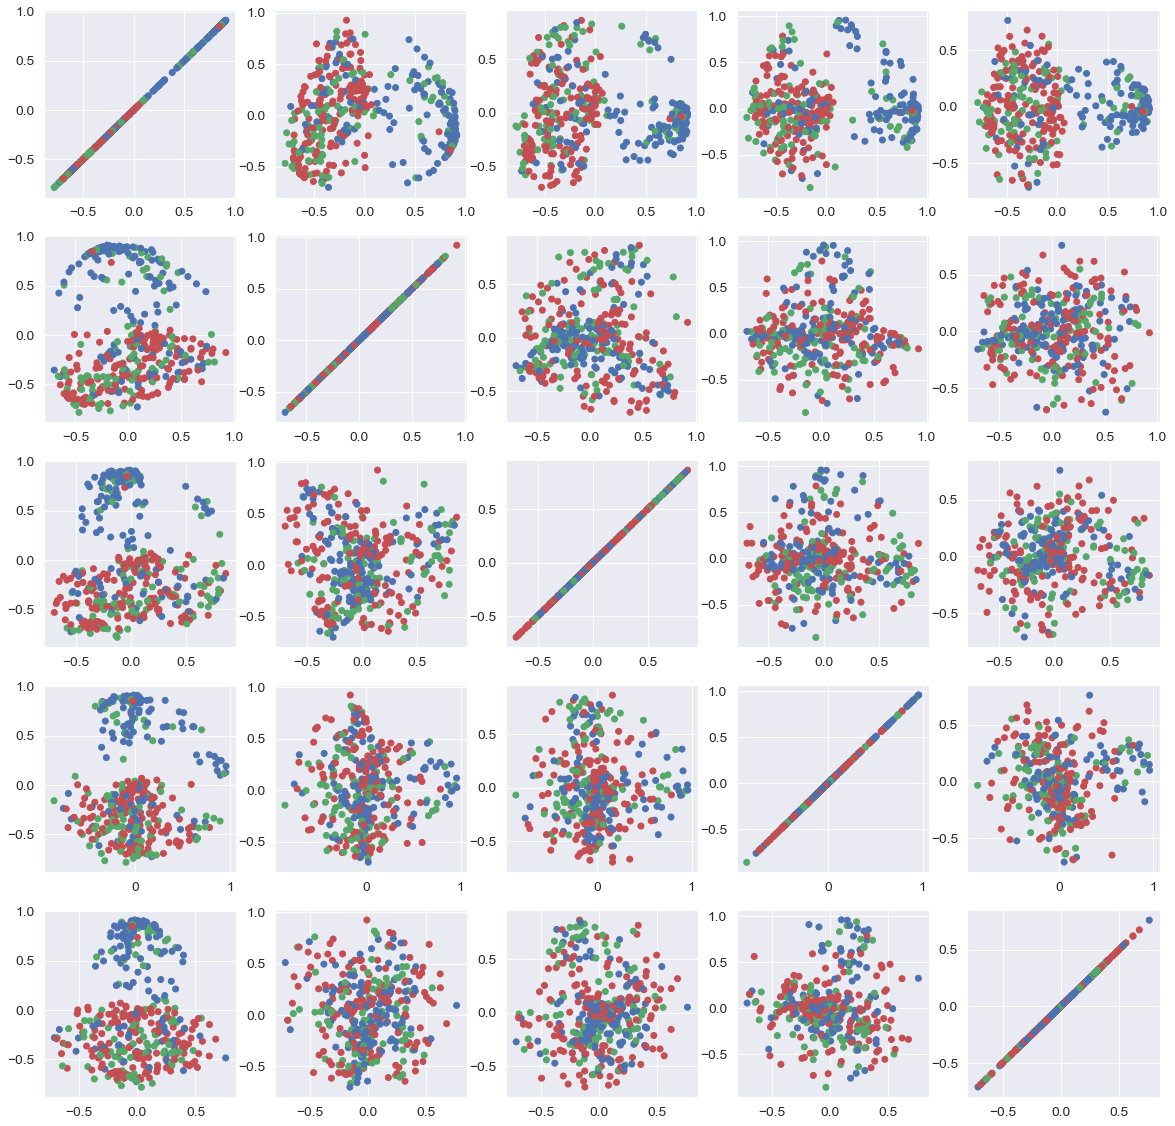

In [8]:
from sklearn.decomposition import PCA
import matplotlib as mpl

pca = PCA(n_components=5)
pca_fit = pca.fit_transform(X_train)
colors = ['r','g','b']

fig, axes = plt.subplots(5, 5, figsize=(20,20))

for i in range(5):
    for j in range(5):
        axes[i, j].scatter(pca_fit[:, i], pca_fit[:, j],c = y_train, cmap = mpl.colors.ListedColormap(colors))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = GridSearchCV(estimator=SVC(gamma= 'auto', C=1),
                   param_grid={
                       'C': [10 ** x for x in range(5)],
                       'kernel': ('linear', 'rbf'),
                       'gamma': [1  / (10 ** x) for x in range(5)]})
clf.fit(X_train, y_train)

print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1
Best Kernel: linear
Best Gamma: 1.0


C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

classifiers = {
#           
    "SVM" : SVC(kernel = "linear", gamma = 1, C = 1),
    "Random Forest Classifier":RandomForestClassifier(max_leaf_nodes=5,max_depth= 10, n_estimators=500, max_features=10,  criterion = 'entropy',),
               "Decision Trees":DecisionTreeClassifier(max_leaf_nodes=12, random_state=42, splitter='best', max_depth= 10),
               "XG Boost":XGBClassifier(n_estimators = 1000, max_leaf_nodes= 8, max_depth= 6, random_state= 0),
               "Gradient Boosting Classifier":GradientBoostingClassifier(n_estimators = 1000, max_leaf_nodes= 7, max_depth= 10, random_state= 42, learning_rate = 0.01),
               "AdaBoostClassifier" : AdaBoostClassifier(DecisionTreeClassifier(max_depth=12 , max_leaf_nodes=7, splitter='best'), algorithm="SAMME", n_estimators=1000, random_state=42, learning_rate=0.01),
    "OneVsRestClassifier - MLP CLASSIFIER" :  OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5)),
    "OneVsRestClassifier - Random Forest Classifier" :  OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))
}
models = {}
cv = KFold(n_splits=20)
    
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv)

    y_pred = classifier.predict(X_test)  
    if True:
        print("{c}".format(c=classifier_name))

    #Getting the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels =[0, 1, 2])
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    
    print("Confusion matrix:\n{}".format(cm))
    #Overall Accuracy
    Accuracy = accuracy_score(y_test, y_pred)
    
#     print("Performance Metrics")    
    table = [ ("Training Accuracy",  np.mean(cv_scores)) , ("Test Accuracy",Accuracy)]

    print(PrettyTable(table))
    print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_pred).sum()))
    print(classification_report(y_test, y_pred, digits =3))
#     print("confusion matrix", confusion_matrix(y_test, y_pred, labels =[0, 1, 2]))

SVM
Confusion matrix:
[[42  0  2]
 [11  0  5]
 [14  1 27]]
+-------------------------------------------+---------------------------------------+
| ('Training Accuracy', 0.5965476190476192) | ('Test Accuracy', 0.6764705882352942) |
+-------------------------------------------+---------------------------------------+
+-------------------------------------------+---------------------------------------+

Number of mislabeled points out of a total 102 points: 33
              precision    recall  f1-score   support

           0      0.627     0.955     0.757        44
           1      0.000     0.000     0.000        16
           2      0.794     0.643     0.711        42

    accuracy                          0.676       102
   macro avg      0.474     0.532     0.489       102
weighted avg      0.597     0.676     0.619       102

Random Forest Classifier
Confusion matrix:
[[42  0  2]
 [11  0  5]
 [14  0 28]]
+------------------------------------------+---------------------------------

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


XG Boost
Confusion matrix:
[[30 10  4]
 [ 2  7  7]
 [ 8  7 27]]
+------------------------------------------+---------------------------------------+
| ('Training Accuracy', 0.604642857142857) | ('Test Accuracy', 0.6274509803921569) |
+------------------------------------------+---------------------------------------+
+------------------------------------------+---------------------------------------+

Number of mislabeled points out of a total 102 points: 38
              precision    recall  f1-score   support

           0      0.750     0.682     0.714        44
           1      0.292     0.438     0.350        16
           2      0.711     0.643     0.675        42

    accuracy                          0.627       102
   macro avg      0.584     0.587     0.580       102
weighted avg      0.662     0.627     0.641       102

Gradient Boosting Classifier
Confusion matrix:
[[28 13  3]
 [ 6  4  6]
 [ 9  3 30]]
+-------------------------------------------+---------------------------

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


OneVsRestClassifier - MLP CLASSIFIER
Confusion matrix:
[[29 10  5]
 [ 3  7  6]
 [11  5 26]]
+-------------------------------------------+---------------------------------------+
| ('Training Accuracy', 0.5698809523809525) | ('Test Accuracy', 0.6078431372549019) |
+-------------------------------------------+---------------------------------------+
+-------------------------------------------+---------------------------------------+

Number of mislabeled points out of a total 102 points: 40
              precision    recall  f1-score   support

           0      0.674     0.659     0.667        44
           1      0.318     0.438     0.368        16
           2      0.703     0.619     0.658        42

    accuracy                          0.608       102
   macro avg      0.565     0.572     0.564       102
weighted avg      0.630     0.608     0.616       102

OneVsRestClassifier - Random Forest Classifier
Confusion matrix:
[[32 10  2]
 [ 7  4  5]
 [ 9  5 28]]
+---------------------